In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import time

In [2]:
#Students' performance in maths
student_data=pd.read_csv("student-mat.csv")
student_data.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
col_str=student_data.columns[student_data.dtypes==object]
col_str

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [4]:
#Convert each category value into a new column and assign a 1or0(True or False) value to column
#This has the benefit of not weighing a value improperly. Simplest method is using pandas.get_dummies() method
#drop_first=True reduces extra column creation
student_data=pd.get_dummies(student_data,columns=col_str,drop_first=True)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    bool 
 17  sex_M           

In [5]:
print(student_data[['G1','G2','G3']].corr())

          G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000


In [6]:
#since G1,G2,G3 has very high correlation we can drop G1.G2
student_data.drop(axis=1,labels=['G1','G2'])

#Drop the G3 column because we want to predict it now
label=student_data['G3'].values
predictors=student_data.drop(axis=1,labels=['G3']).values
student_data.shape

(395, 42)

In [7]:
#Using Linear Regression to predict grades
lr=linear_model.LinearRegression()

cross_val_score: Used during the testing and validation phase of your machine learning model development


Trains and tests a model over multiple folds of your dataset. This cross validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split.

The number of folds is defined, by default this is 5

The dataset is split up according to these folds, where each fold has a unique set of testing data A model is trained and tested for each fold

Each fold returns a metric for it's test data

The mean and standard deviation of these metrics can then be calculated to provide a single metric for the process

In [8]:
#Returns an array of scores of the estimator for each run of the cross validation
lr_score=cross_val_score(lr,predictors,label,cv=5) #Five runs,5means
print("LR Model Cross Validation Score: "+str(lr_score))

LR Model Cross Validation Score: [0.80082431 0.88326262 0.76802125 0.77353576 0.69558864]


In [9]:
# Average of all those means
print("LR Model Cross Validation Mean Score: "+str(lr_score.mean()))

LR Model Cross Validation Mean Score: 0.7842465150674716


### USING PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio=pca.explained_variance_ratio_
pca.explained_variance_ratio_.shape

(41,)

In [11]:
#NOW PLOT
#Find cumulatve variance,adding one independent variable at a time
variance_ratio_cum_sum=np.cumsum(variance_ratio)
variance_ratio_cum_sum

array([0.60249881, 0.82425422, 0.84911983, 0.86994557, 0.88895871,
       0.90683444, 0.9184901 , 0.92910161, 0.93702158, 0.94355752,
       0.94942391, 0.95429968, 0.95866975, 0.9630082 , 0.96640694,
       0.96972293, 0.97258242, 0.97508701, 0.97731633, 0.97952796,
       0.98162043, 0.98358934, 0.98540947, 0.98693444, 0.98836369,
       0.98977799, 0.99104426, 0.99226527, 0.99329196, 0.99430959,
       0.99522784, 0.99608811, 0.99682872, 0.99753783, 0.99813929,
       0.99862811, 0.99906095, 0.99944395, 0.99975004, 0.99991243,
       1.        ])

This cumulative explained variance graph helps us to choose the number of desired principal components. If we look at the above print statement's output, we will realize that 99% variation in the data is explaining by the first 6 principal components. Hence, we annotate 6 on the graph.

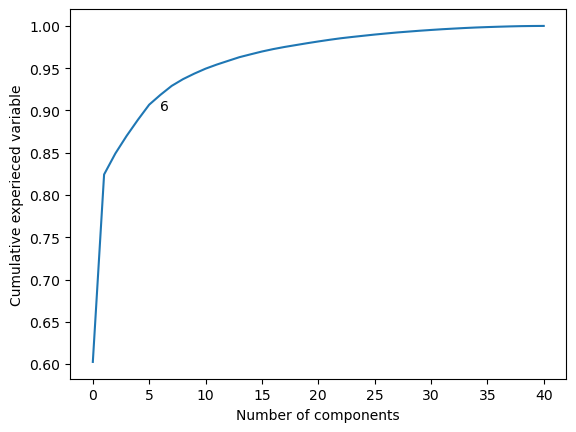

In [12]:
plt.plot(variance_ratio_cum_sum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative experieced variable")
#Annotate 90% variance explained by the first 6 variables only
plt.annotate('6',xy=(6,.90))
plt.show()

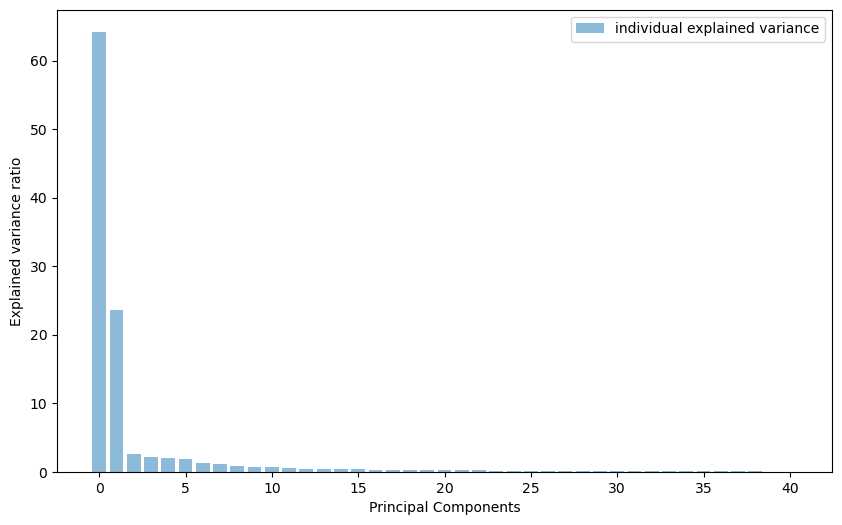

In [13]:
#individual explained variance,instead of cumulative variance
#We see that the first variable causes 60%variance the second 22% and so on

plt.figure(figsize=(10,6))
plt.bar(range(41),pca.explained_variance_,alpha=0.5,label='individual explained variance')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal Components")
plt.legend(loc='best')
plt.show()

PCA transforms a set of correlated variables into a set of linearly uncorrelated variables called principal components, we can check the correlarion with a heat map of correlation matrix

correlation between the variables of the original data

we see high correlation, which means duplication we can eliminate many variables

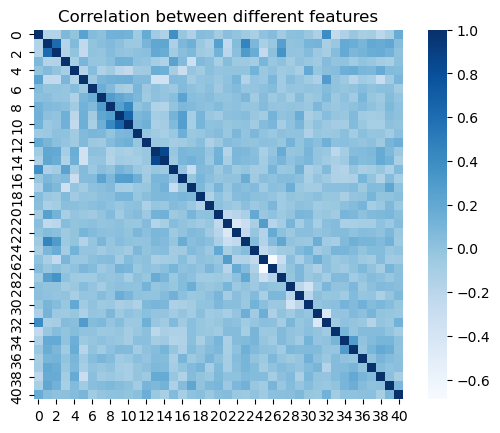

In [14]:
import seaborn as sns
correlation=pd.DataFrame(predictors).corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='Blues')
plt.title("Correlation between different features")
plt.show()

In [15]:
#Looking at the above plot we are taking 6 variables
pca=PCA(n_components=6)
pca.fit(predictors)
Transformed_vector=pca.fit_transform(predictors)
Transformed_vector

array([[ 0.55160707,  7.2305083 , -1.26671855, -1.35402793, -0.57929047,
        -1.50629358],
       [-1.50987417,  8.2744093 , -1.73787295,  1.23849142, -1.01028004,
         0.74226977],
       [ 4.38990076,  4.6585758 , -0.34248862,  0.36624141, -2.08862574,
         1.84768947],
       ...,
       [-2.48779667,  3.26562797,  2.63320957,  4.75271984,  0.3581546 ,
        -0.5144884 ],
       [-5.667013  , -0.70227676,  2.32050876,  0.60903253,  0.12242516,
         1.59557514],
       [-0.53044166,  3.50946062,  1.67073111,  1.94837153, -0.70986028,
         2.05029266]])

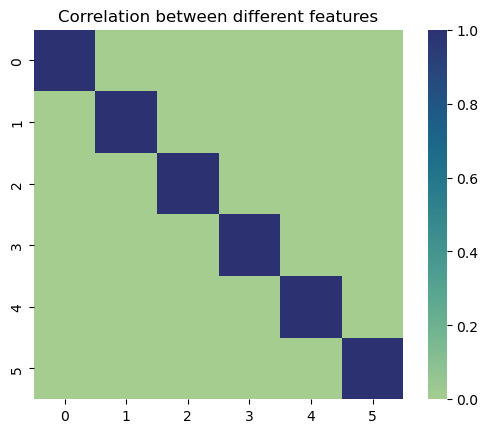

In [16]:
# correlation betwen the 6 variables after transforming the data with pca is 0
import seaborn as sns
correlation=pd.DataFrame(Transformed_vector).corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='crest')
plt.title("Correlation between different features")
plt.show()

In [17]:
# Check the performance with ^ variables
lr_pca=linear_model.LinearRegression()
lr_pca_score=cross_val_score(lr_pca,Transformed_vector,label,cv=5)
print("PCA Model Cross Validation Score: "+str(lr_pca_score))
print("PCA Model Cross validation Mean Score:"+str(lr_pca_score.mean()))


PCA Model Cross Validation Score: [0.82099262 0.90037318 0.83908963 0.76730558 0.72845792]
PCA Model Cross validation Mean Score:0.8112437875167652


We see values similar to the earlier case when we had 40 independent variables
This means that the PCA has indeed reduced the 40 variables to 6 without causing any negative impact